In [40]:
# For data visualization
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(style='darkgrid')

# For data preparation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, learning_curve

# For model evaluation
from sklearn import metrics

# For classification
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.svm import NuSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from catboost import CatBoostClassifier

In [2]:
data_water = pd.read_csv("./water_potability.csv")
data_water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
data_water.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


We can see that we have missing values in some columns, so we will study the impact of deleting the corresponding rows to see if this does not affect the distribution

In [4]:
data_water.groupby(['Potability']).mean()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Potability,,,,,,,,,
0,7.085378,196.733292,21777.490788,7.092175,334.56429,426.730454,14.364335,66.303555,3.965800
1,7.073783,195.800744,22383.991018,7.169338,332.56699,425.383800,14.160893,66.539684,3.968328


We can see that the distribution is relatively equivalent and therefore the classification is complicated

Text(0.5, 1.0, 'Data distribution')

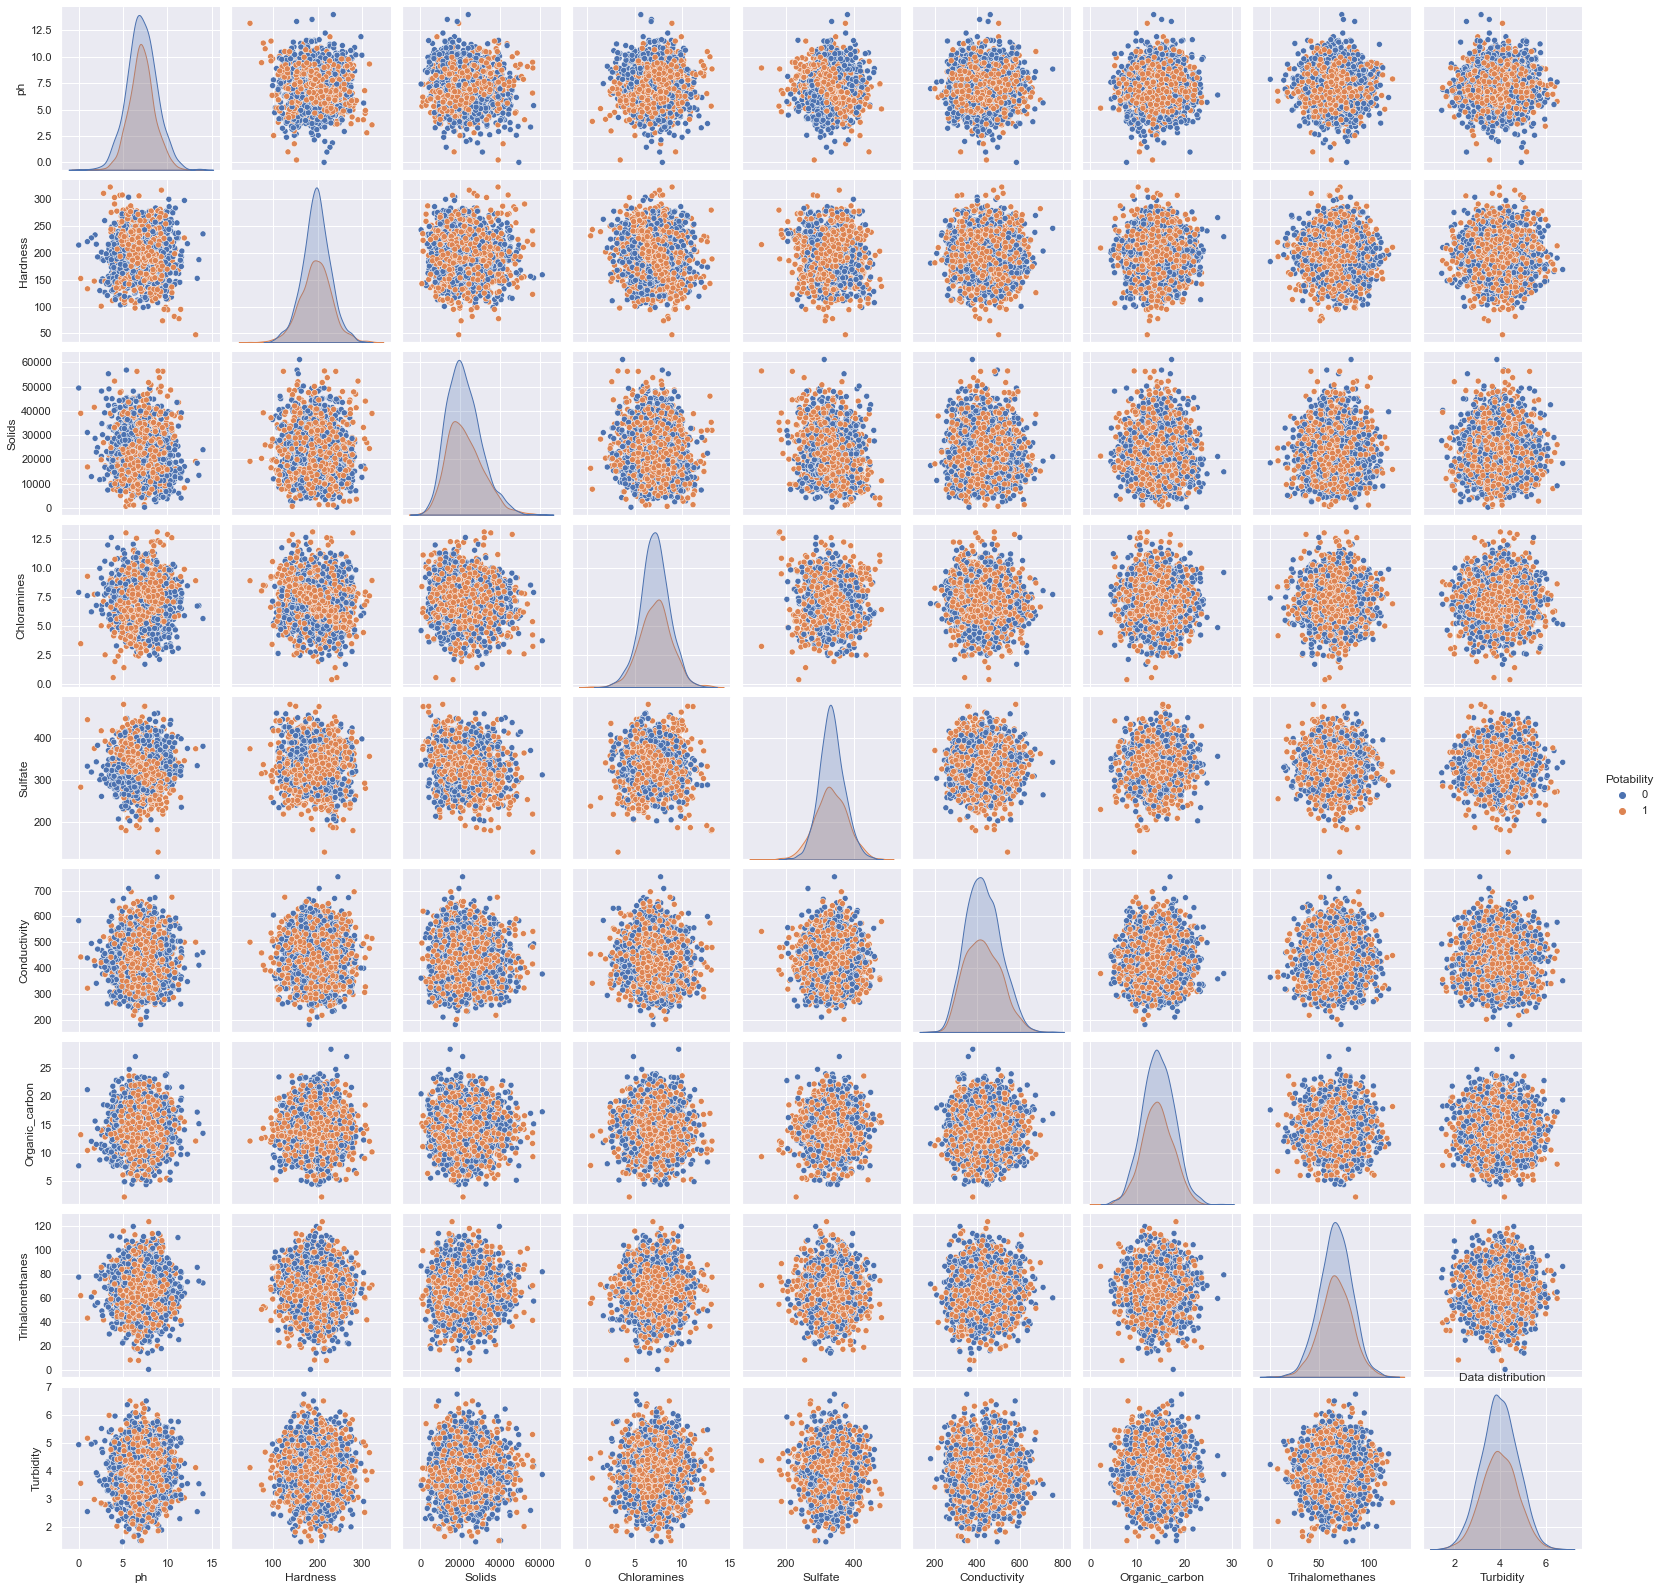

In [5]:
sns.set_theme(style='darkgrid')
sns.pairplot(data_water, hue='Potability')
plt.title('Data distribution')

This confirms the result found with the groupby which proves that the variables put one by one are not clear enough to differentiate between drinking water and non-drinking water and therefore should be used all

We will see the impact of deleting the rows containing no data and see if it gives a good result nevertheless

In [3]:
data_water.dropna(axis=0, inplace=True)

In [7]:
data_water.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,7.085990,195.968072,21917.441374,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729,0.403282
std,1.573337,32.635085,8642.239815,1.584820,41.205172,80.712572,3.324959,16.077109,0.780346,0.490678
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,6.089723,176.744938,15615.665390,6.138895,307.632511,366.680307,12.124105,55.952664,3.442915,0.000000
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177,0.000000
75%,8.052969,216.441070,27182.587067,8.109726,359.330555,482.373169,16.683049,77.291925,4.514175,1.000000
max,14.000000,317.338124,56488.672413,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


In [8]:
data_water.groupby(['Potability']).mean()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Potability,,,,,,,,,
0,7.067201,196.008440,21628.535122,7.107267,333.742928,427.554342,14.400250,66.278712,3.955181
1,7.113791,195.908341,22344.922883,7.174395,332.457832,425.005423,14.294764,66.581596,3.991254


The removal of the lines did not greatly impact the overall distribution and therefore it was a relatively good choice to remove these lines. I see now the distribution of the classes to see if it is an unbalanced classification or not

In [9]:
data_water['Potability'].value_counts()

0    1200
1     811
Name: Potability, dtype: int64

We can see that there is a slight imbalance between the two classes, but it is not a big deal, a resampling of the training samples can be considered. 

We now move on to the design of a series of classification models to differentiate drinking water from non-drinking water

In [4]:
fv = data_water.copy()
etiq = fv['Potability']
fv.drop(['Potability'], axis=1, inplace=True)

In [11]:
fv

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425
...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712


We now move on to the normalization of the data to allow a better use of the classification algorithms (apart from the algorithms based on decision trees)

In [5]:
fv_scaled = StandardScaler().fit_transform(fv)
fv_scaled = pd.DataFrame(fv_scaled)
fv_scaled

,0,1,2,3,4,5,6,7,8
0,0.782466,0.564114,0.011687,0.583804,0.574378,-0.783962,1.227032,2.111652,0.844761
1,1.275463,-0.455653,-0.455835,-0.370947,-0.560480,-0.348429,-0.842154,-2.140399,0.135033
2,-0.954835,-0.234614,0.790645,0.259104,-0.158911,-1.810063,-1.792340,-0.714423,-1.807366
3,1.994902,1.596951,0.790764,0.239248,1.467140,-1.770608,-0.170876,1.132494,-1.662163
4,0.985323,0.226606,-0.954313,-1.622878,-0.726179,0.595858,-0.599824,-0.224135,0.553348
...,...,...,...,...,...,...,...,...,...
2006,1.210411,0.584770,-0.693978,-0.528284,-0.492625,-0.447578,-1.341281,-0.705001,0.825626
2007,-0.243774,0.347964,-0.540564,0.362137,-0.697038,-1.205321,0.559422,-2.334474,-0.675183
2008,2.800492,-3.100365,1.767503,1.343596,-1.803476,0.165656,0.546021,-1.545585,0.512125
2009,-0.646160,-0.285317,0.488576,0.387023,0.302843,-0.131852,-0.688929,-0.372108,-0.384562


In [6]:
fv_scaled.columns = list(fv.columns)
fv_scaled

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.782466,0.564114,0.011687,0.583804,0.574378,-0.783962,1.227032,2.111652,0.844761
1,1.275463,-0.455653,-0.455835,-0.370947,-0.560480,-0.348429,-0.842154,-2.140399,0.135033
2,-0.954835,-0.234614,0.790645,0.259104,-0.158911,-1.810063,-1.792340,-0.714423,-1.807366
3,1.994902,1.596951,0.790764,0.239248,1.467140,-1.770608,-0.170876,1.132494,-1.662163
4,0.985323,0.226606,-0.954313,-1.622878,-0.726179,0.595858,-0.599824,-0.224135,0.553348
...,...,...,...,...,...,...,...,...,...
2006,1.210411,0.584770,-0.693978,-0.528284,-0.492625,-0.447578,-1.341281,-0.705001,0.825626
2007,-0.243774,0.347964,-0.540564,0.362137,-0.697038,-1.205321,0.559422,-2.334474,-0.675183
2008,2.800492,-3.100365,1.767503,1.343596,-1.803476,0.165656,0.546021,-1.545585,0.512125
2009,-0.646160,-0.285317,0.488576,0.387023,0.302843,-0.131852,-0.688929,-0.372108,-0.384562


We subdivide our dataset in two datasets, training and test with the following proportions: 
- 70% will be for the training phase
- 30% will be for the test phase

We will see the impact of the non-normalization of data with algorithms based on decision trees. 

In [7]:
fv_train, fv_test, etiq_train, etiq_test = train_test_split(fv_scaled, etiq, test_size=0.3,random_state=42) 

We will use several classifiers: 
1) KNN
2) Fully connected neural network MLP
3) SVM with different kernels
4) Random Forrest
5) Naive Bayes (Gaussian, Multinomial)
6) Gradient Boosting Classifier
7) LGBM Classifier
8) XGBoost
9) Gaussian Processes
10) Extremely randomized tree classifiers
11) Histogram-Based Gradient Boosting
12) Adaboost
#### 1. KNN

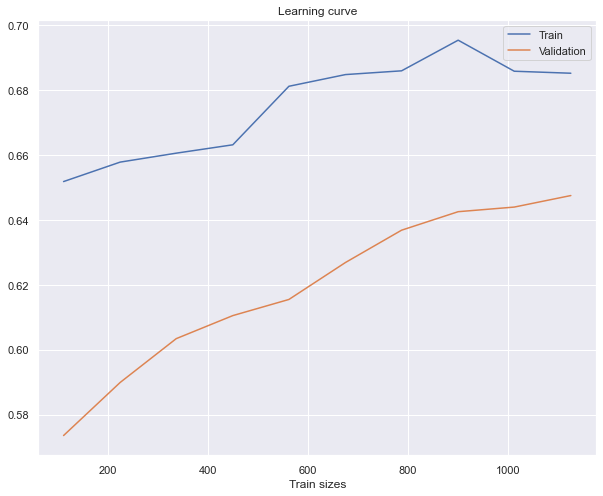

In [15]:
parameters = {'n_neighbors':np.arange(1,20,1), 'p' : np.arange(1,3,1)}
knn=KNeighborsClassifier()
clf = GridSearchCV(knn, parameters)
clf.fit(fv_train,etiq_train)
knn=KNeighborsClassifier(**clf.best_params_)
knn.fit(fv_train,etiq_train)

N, train_score, val_score = learning_curve(knn, fv_train, etiq_train, train_sizes=np.linspace(0.1, 1.0, 10), cv = 5)

plt.figure(figsize=(10,8))
plt.plot(N, train_score.mean(axis=1), label='Train')
plt.plot(N, val_score.mean(axis=1), label='Validation')
plt.xlabel('Train sizes')
plt.title('Learning curve')
plt.legend()

Accuracy :  0.6341059602649006
F1-score KNN :  0.5606289519332999
ROC AUC score KNN :  0.5802081565699417
              precision    recall  f1-score   support

           0       0.64      0.89      0.74       355
           1       0.63      0.27      0.38       249

    accuracy                           0.63       604
   macro avg       0.63      0.58      0.56       604
weighted avg       0.63      0.63      0.59       604



Text(0.5, 1.0, 'Confusion matrix KNN')

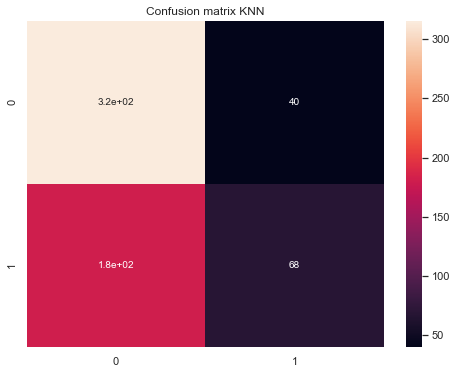

In [16]:
yknn=knn.predict(fv_test)
print("Accuracy : ",metrics.accuracy_score(etiq_test, yknn))
print("F1-score KNN : ", metrics.f1_score(etiq_test, yknn, average='macro'))
print("ROC AUC score KNN : ", metrics.roc_auc_score(etiq_test, yknn, average='macro'))
print(metrics.classification_report(etiq_test, yknn))

plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test, yknn), annot=True, annot_kws={"size": 10})
plt.title('Confusion matrix KNN')

We can see that the K-nearest neighbors algorithm is not efficient on this problem giving us at best an accuracy of about 64% which is very low, even worse when analyzing the metrics adapted to an unbalanced problem like the F1-score, we will then move to other classifiers 
#### 2. MLP

In [17]:
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, activation='relu', max_iter = 1000 , hidden_layer_sizes=(15,25, 50, 35, 15), random_state=1).fit(fv_train,etiq_train)
ymlp = mlp.predict(fv_test)
print("Taux de précision lors des tests : ",metrics.accuracy_score(etiq_test, ymlp))
print("F1-score MLP : ", metrics.f1_score(etiq_test, ymlp, average='macro'))
print("ROC AUC score MLP : ", metrics.roc_auc_score(etiq_test, ymlp, average='macro'))

Taux de précision lors des tests :  0.6341059602649006
F1-score MLP :  0.6217887146358394
ROC AUC score MLP :  0.6215792748458623


Text(0.5, 1.0, 'Confusion matrix MLP')

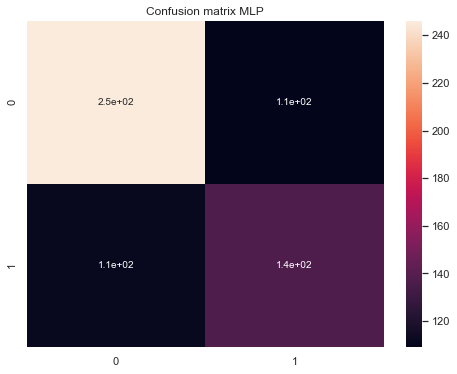

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test, ymlp), annot=True, annot_kws={"size": 10})
plt.title('Confusion matrix MLP')

We can see that with the multilayer neural network a better equity between the two classes during the classification
#### 3. a) SVM

Accuracy :  0.6788079470198676
F1-score SVM :  0.6265187735067252
ROC AUC score SVM :  0.6326262797669552
              precision    recall  f1-score   support

           0       0.67      0.90      0.77       355
           1       0.71      0.37      0.49       249

    accuracy                           0.68       604
   macro avg       0.69      0.63      0.63       604
weighted avg       0.69      0.68      0.65       604



Text(0.5, 1.0, 'Confusion matrix SVM')

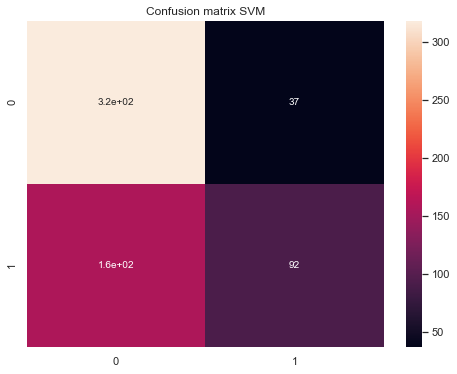

In [19]:
parameters = {'degree':np.arange(1,20,1)}
svm=SVC(gamma='scale', class_weight='balanced')
clf = GridSearchCV(svm, parameters)
clf.fit(fv_train,etiq_train)
svm=SVC(**clf.best_params_)
svm.fit(fv_train,etiq_train)
ysvm=svm.predict(fv_test)
print("Accuracy : ",metrics.accuracy_score(etiq_test, ysvm))
print("F1-score SVM : ",metrics.f1_score(etiq_test, ysvm, average='macro'))
print("ROC AUC score SVM : ", metrics.roc_auc_score(etiq_test, ysvm, average='macro'))
print(metrics.classification_report(etiq_test, ysvm))

plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test, ysvm), annot=True, annot_kws={"size": 10})
plt.title('Confusion matrix SVM')

We can see that the SVM has almost the same behavior as the KNN, we have the multilayer neural network which remains better in terms of equity of the two classes
#### 3. b) NuSVC

Accuracy :  0.6754966887417219
F1-score NuSVM :  0.650343206171804
ROC AUC score NuSVM :  0.6483964025114543
              precision    recall  f1-score   support

           0       0.69      0.80      0.74       355
           1       0.64      0.49      0.56       249

    accuracy                           0.68       604
   macro avg       0.67      0.65      0.65       604
weighted avg       0.67      0.68      0.67       604



Text(0.5, 1.0, 'Confusion matrix NuSVM')

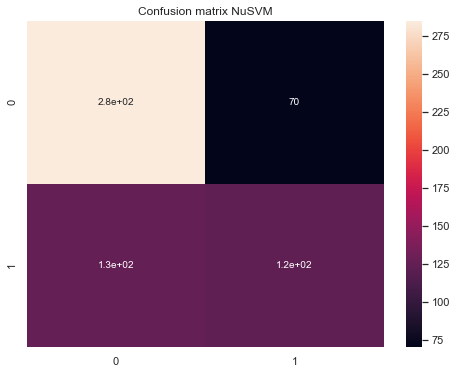

In [20]:
parameters = {'degree':np.arange(1,20,1)}
nusvm=NuSVC(gamma='scale', class_weight='balanced')
clf = GridSearchCV(nusvm, parameters)
clf.fit(fv_train,etiq_train)
nusvm=NuSVC(**clf.best_params_)
nusvm.fit(fv_train,etiq_train)
ynusvm=nusvm.predict(fv_test)
print("Accuracy : ",metrics.accuracy_score(etiq_test, ynusvm))
print("F1-score NuSVM : ",metrics.f1_score(etiq_test, ynusvm, average='macro'))
print("ROC AUC score NuSVM : ", metrics.roc_auc_score(etiq_test, ynusvm, average='macro'))
print(metrics.classification_report(etiq_test, ynusvm))

plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test, ynusvm), annot=True, annot_kws={"size": 10})
plt.title('Confusion matrix NuSVM')

We see results equivalent to the results found with a SVM, but there also the same remark as with the MLP, we see a better equity during the classification
#### 4. Random Forest

In [29]:
parameters = {'n_estimators':np.arange(50,302,5)}
forrest = RandomForestClassifier(max_features = 'sqrt', criterion = 'entropy')
clf = GridSearchCV(forrest, parameters, scoring='f1_macro')
clf.fit(fv_train,etiq_train)
forrest = RandomForestClassifier(**clf.best_params_)
forrest.fit(fv_train,etiq_train)
yforrest = forrest.predict(fv_test)
print("Accuracy : ",metrics.accuracy_score(etiq_test, yforrest))
print("F1-score Random Forest : ",metrics.f1_score(etiq_test, yforrest, average='macro'))
print("ROC AUC score Random Forest : ", metrics.roc_auc_score(etiq_test, yforrest, average='macro'))
print(metrics.classification_report(etiq_test, yforrest))

Accuracy :  0.6821192052980133
F1-score Random Forest :  0.6438460498998808
ROC AUC score Random Forest :  0.6444369025397364
              precision    recall  f1-score   support

           0       0.68      0.86      0.76       355
           1       0.68      0.43      0.53       249

    accuracy                           0.68       604
   macro avg       0.68      0.64      0.64       604
weighted avg       0.68      0.68      0.66       604



Text(0.5, 1.0, 'Confusion matrix Random Forest')

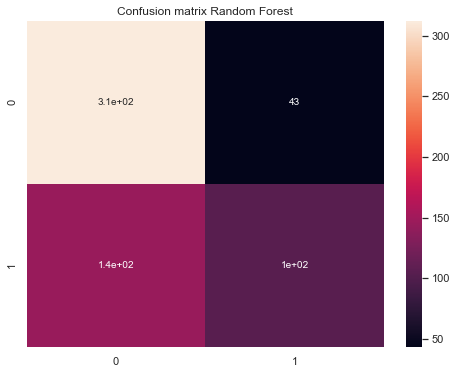

In [28]:
plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test, yforrest), annot=True, annot_kws={"size": 10})
plt.title('Confusion matrix Random Forest')

#### 5. Naive Bayes

In [18]:
gaussNaive = GaussianNB().fit(fv_train,etiq_train)
ygaussNaive = gaussNaive.predict(fv_test)
print("Accuracy : ",metrics.accuracy_score(etiq_test, ygaussNaive))
print("F1-score Naive Bayes : ",metrics.f1_score(etiq_test, ygaussNaive, average='macro'))
print("ROC AUC score Naive Bayes : ", metrics.roc_auc_score(etiq_test, ygaussNaive, average='macro'))
print(metrics.classification_report(etiq_test, ygaussNaive))

Accuracy :  0.6059602649006622
F1-score Naive Bayes :  0.5275977653631285
ROC AUC score Naive Bayes :  0.551467843203801
              precision    recall  f1-score   support

           0       0.62      0.86      0.72       355
           1       0.55      0.24      0.34       249

    accuracy                           0.61       604
   macro avg       0.58      0.55      0.53       604
weighted avg       0.59      0.61      0.56       604



Text(0.5, 1.0, 'Confusion matrix Naive Bayes')

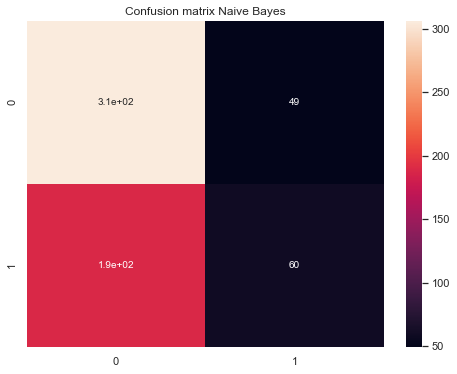

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test, ygaussNaive), annot=True, annot_kws={"size": 10})
plt.title('Confusion matrix Naive Bayes')

#### 6. Gradient Boosting

In [17]:
gbc = GradientBoostingClassifier(loss='deviance',learning_rate=0.1,n_estimators=130, subsample =1.0, criterion='friedman_mse', max_features='log2', random_state=40).fit(fv_train,etiq_train)
ygbc = gbc.predict(fv_test)
print("Accuracy : ",metrics.accuracy_score(etiq_test, ygbc))
print("F1-score Gradient Boosting : ",metrics.f1_score(etiq_test, ygbc, average='macro'))
print("ROC AUC score Gradient Boosting : ", metrics.roc_auc_score(etiq_test, ygbc, average='macro'))
print(metrics.classification_report(etiq_test, ygbc))

Accuracy :  0.652317880794702
F1-score Gradient Boosting :  0.6034663865546218
ROC AUC score Gradient Boosting :  0.6094914870750607
              precision    recall  f1-score   support

           0       0.66      0.85      0.74       355
           1       0.64      0.37      0.46       249

    accuracy                           0.65       604
   macro avg       0.65      0.61      0.60       604
weighted avg       0.65      0.65      0.63       604



Text(0.5, 1.0, 'Confusion matrix Gradient Boosting')

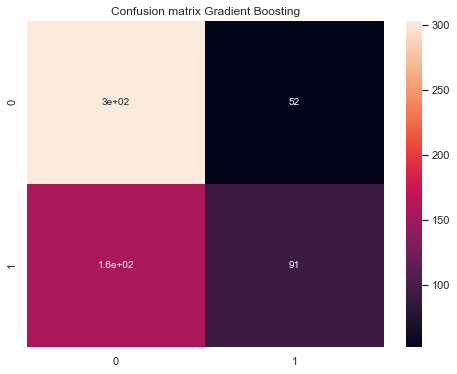

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test, ygbc), annot=True, annot_kws={"size": 10})
plt.title('Confusion matrix Gradient Boosting')

#### 7. LGBM Classifier

In [16]:
lightmodel = LGBMClassifier(boosting_type='dart', num_leaves=31, max_depth=- 1, learning_rate=0.01, n_estimators=145, random_state=15, importance_type='split').fit(fv_train,etiq_train)
ygbm = lightmodel.predict(fv_test)
print("Accuracy : ",metrics.accuracy_score(etiq_test, ygbm))
print("F1-score LGBM : ",metrics.f1_score(etiq_test, ygbm, average='macro'))
print("ROC AUC score LGBM : ", metrics.roc_auc_score(etiq_test, ygbm, average='macro'))
print(metrics.classification_report(etiq_test, ygbm))

Accuracy :  0.6854304635761589
F1-score LGBM :  0.6309872922776149
ROC AUC score LGBM :  0.637660501159568
              precision    recall  f1-score   support

           0       0.67      0.91      0.77       355
           1       0.74      0.37      0.49       249

    accuracy                           0.69       604
   macro avg       0.71      0.64      0.63       604
weighted avg       0.70      0.69      0.66       604



Text(0.5, 1.0, 'Confusion matrix LGBM')

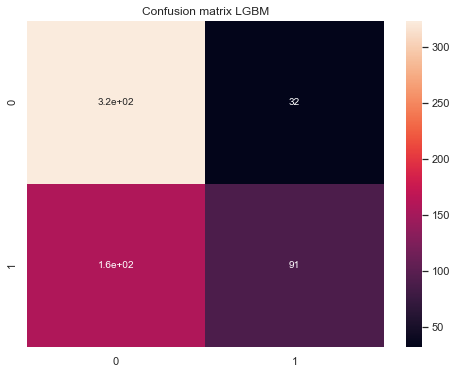

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test, ygbm), annot=True, annot_kws={"size": 10})
plt.title('Confusion matrix LGBM')

#### 8. Catboost

In [22]:
cat = CatBoostClassifier().fit(fv_train,etiq_train)
ycat = cat.predict(fv_test)

Learning rate set to 0.011919
0:	learn: 0.6911084	total: 8.46ms	remaining: 8.46s
1:	learn: 0.6899059	total: 14.3ms	remaining: 7.11s
2:	learn: 0.6883923	total: 20.3ms	remaining: 6.74s
3:	learn: 0.6866884	total: 26.2ms	remaining: 6.52s
4:	learn: 0.6850988	total: 32.8ms	remaining: 6.52s
5:	learn: 0.6835075	total: 38.5ms	remaining: 6.38s
6:	learn: 0.6821278	total: 45.1ms	remaining: 6.39s
7:	learn: 0.6808231	total: 56.3ms	remaining: 6.99s
8:	learn: 0.6791426	total: 70.7ms	remaining: 7.79s
9:	learn: 0.6770816	total: 78.4ms	remaining: 7.76s
10:	learn: 0.6754000	total: 83ms	remaining: 7.46s
11:	learn: 0.6735215	total: 87.1ms	remaining: 7.17s
12:	learn: 0.6720588	total: 91.7ms	remaining: 6.96s
13:	learn: 0.6712038	total: 101ms	remaining: 7.08s
14:	learn: 0.6697219	total: 106ms	remaining: 6.97s
15:	learn: 0.6686746	total: 114ms	remaining: 7.01s
16:	learn: 0.6669735	total: 124ms	remaining: 7.19s
17:	learn: 0.6651463	total: 133ms	remaining: 7.27s
18:	learn: 0.6637296	total: 141ms	remaining: 7.26s


In [23]:
print("Accuracy : ",metrics.accuracy_score(etiq_test, ycat))
print("F1-score Catboost : ",metrics.f1_score(etiq_test, ycat, average='macro'))
print("ROC AUC score Catboost : ", metrics.roc_auc_score(etiq_test, ycat, average='macro'))
print(metrics.classification_report(etiq_test, ycat))

Accuracy :  0.6738410596026491
F1-score Catboost :  0.6400748961707972
ROC AUC score Catboost :  0.6397929747157645
              precision    recall  f1-score   support

           0       0.68      0.83      0.75       355
           1       0.65      0.45      0.53       249

    accuracy                           0.67       604
   macro avg       0.67      0.64      0.64       604
weighted avg       0.67      0.67      0.66       604



Text(0.5, 1.0, 'Confusion matrix Catboost')

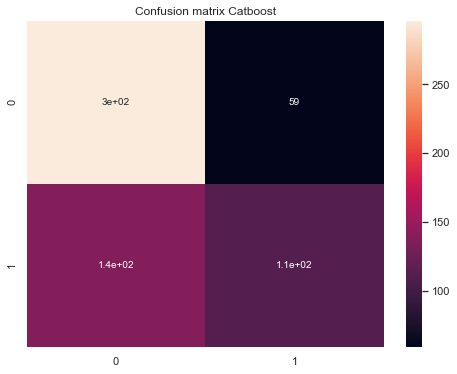

In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test, ycat), annot=True, annot_kws={"size": 10})
plt.title('Confusion matrix Catboost')

#### 9. XGBoost

In [27]:
xgbc = XGBClassifier(eval_metric='logloss', use_label_encoder=False).fit(fv_train,etiq_train)
yxgbc = xgbc.predict(fv_test)
print("Accuracy : ",metrics.accuracy_score(etiq_test, yxgbc))
print("F1-score XGBoost : ",metrics.f1_score(etiq_test, yxgbc, average='macro'))
print("ROC AUC score XGBoost : ", metrics.roc_auc_score(etiq_test, yxgbc, average='macro'))
print(metrics.classification_report(etiq_test, yxgbc))

Accuracy :  0.6572847682119205
F1-score XGBoost :  0.6337860676553205
ROC AUC score XGBoost :  0.6323038633406867
              precision    recall  f1-score   support

           0       0.68      0.77      0.73       355
           1       0.60      0.49      0.54       249

    accuracy                           0.66       604
   macro avg       0.64      0.63      0.63       604
weighted avg       0.65      0.66      0.65       604



Text(0.5, 1.0, 'Confusion matrix XGBoost')

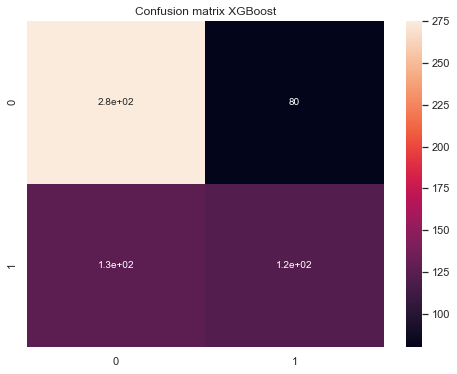

In [29]:
plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test, yxgbc), annot=True, annot_kws={"size": 10})
plt.title('Confusion matrix XGBoost')

#### 10. Gaussian Processes

In [28]:
gpc = GaussianProcessClassifier().fit(fv_train,etiq_train)
ygpc = gpc.predict(fv_test)
print("Accuracy : ",metrics.accuracy_score(etiq_test, ygpc))
print("F1-score Gaussian Processes : ",metrics.f1_score(etiq_test, ygpc, average='macro'))
print("ROC AUC score Gaussian Processes : ", metrics.roc_auc_score(etiq_test, ygpc, average='macro'))
print(metrics.classification_report(etiq_test, ygpc))

Accuracy :  0.6771523178807947
F1-score Gaussian Processes :  0.6341861122413167
ROC AUC score Gaussian Processes :  0.6366140618813281
              precision    recall  f1-score   support

           0       0.68      0.87      0.76       355
           1       0.68      0.41      0.51       249

    accuracy                           0.68       604
   macro avg       0.68      0.64      0.63       604
weighted avg       0.68      0.68      0.66       604



Text(0.5, 1.0, 'Confusion matrix Gaussian processes')

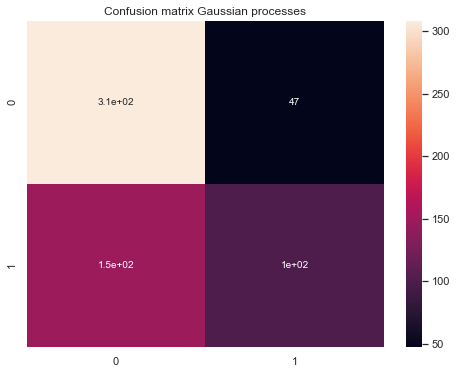

In [30]:
plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test, ygpc), annot=True, annot_kws={"size": 10})
plt.title('Confusion matrix Gaussian processes')

#### 11. Extremely randomized tree classifiers

In [31]:
extra = ExtraTreesClassifier(n_estimators=350, criterion='entropy', max_features='auto', random_state=0).fit(fv_train,etiq_train)
yextra = extra.predict(fv_test)
print("Accuracy : ",metrics.accuracy_score(etiq_test, yextra))
print("F1-score Extremely randomized tree : ",metrics.f1_score(etiq_test, yextra, average='macro'))
print("ROC AUC score Extremely randomized tree : ", metrics.roc_auc_score(etiq_test, yextra, average='macro'))
print(metrics.classification_report(etiq_test, yextra))

Accuracy :  0.6937086092715232
F1-score Extremely randomized tree :  0.6453677873095367
ROC AUC score Extremely randomized tree :  0.6488998246507155
              precision    recall  f1-score   support

           0       0.68      0.90      0.78       355
           1       0.74      0.39      0.51       249

    accuracy                           0.69       604
   macro avg       0.71      0.65      0.65       604
weighted avg       0.71      0.69      0.67       604



Text(0.5, 1.0, 'Confusion matrix Extremely randomized tree')

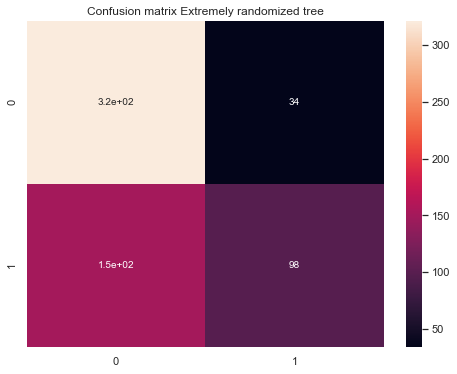

In [32]:
plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test, yextra), annot=True, annot_kws={"size": 10})
plt.title('Confusion matrix Extremely randomized tree')

#### 12. Histogram-Based Gradient Boosting

In [35]:
hist = GradientBoostingClassifier(loss='exponential', learning_rate=0.1, n_estimators=350, criterion='friedman_mse' , random_state=0).fit(fv_train,etiq_train)
yhist = hist.predict(fv_test)
print("Accuracy : ",metrics.accuracy_score(etiq_test, yhist))
print("F1-score Histogram-Based Gradient Boosting : ",metrics.f1_score(etiq_test, yhist, average='macro'))
print("ROC AUC score Histogram-Based Gradient Boosting : ", metrics.roc_auc_score(etiq_test, yhist, average='macro'))
print(metrics.classification_report(etiq_test, yhist))

Accuracy :  0.6341059602649006
F1-score Histogram-Based Gradient Boosting :  0.6022230499888251
ROC AUC score Histogram-Based Gradient Boosting :  0.6029922506929124
              precision    recall  f1-score   support

           0       0.66      0.78      0.71       355
           1       0.58      0.43      0.49       249

    accuracy                           0.63       604
   macro avg       0.62      0.60      0.60       604
weighted avg       0.63      0.63      0.62       604



Text(0.5, 1.0, 'Confusion matrix Histogram-Based Gradient Boosting')

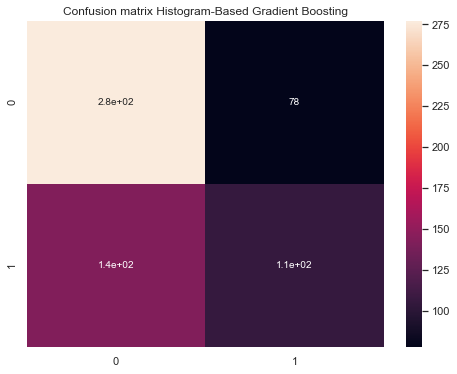

In [36]:
plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test, yhist), annot=True, annot_kws={"size": 10})
plt.title('Confusion matrix Histogram-Based Gradient Boosting')

We have quite low results with the chosen models. 

We now try to make a learning model mixing several of the models used (those with the best results) to allow us to take the strengths of each one to compensate the weaknesses of the others. But before that we will try to visualize the results of the selected algorithms to see the diversity of the results found
### Ensemble Learning
##### a) Hard coding

In [41]:
parameters = {'n_neighbors':np.arange(1,20,1), 'p' : np.arange(1,3,1)}
knn=KNeighborsClassifier()
clf = GridSearchCV(knn, parameters)
clf.fit(fv_train,etiq_train)
knn=KNeighborsClassifier(**clf.best_params_)

mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, activation='relu', max_iter = 1000 , hidden_layer_sizes=(15,25, 50, 35, 15), random_state=1)

parameters2 = {'degree':np.arange(1,20,1)}
svm=SVC(gamma='scale', class_weight='balanced')
clf = GridSearchCV(svm, parameters2)
clf.fit(fv_train,etiq_train)
svm=SVC(**clf.best_params_)


parameters3 = {'degree':np.arange(1,20,1)}
nusvm=NuSVC(gamma='scale', class_weight='balanced')
clf = GridSearchCV(nusvm, parameters3)
clf.fit(fv_train,etiq_train)
nusvm=NuSVC(**clf.best_params_)

parameters4 = {'n_estimators':np.arange(50,302,5)}
forrest = RandomForestClassifier(max_features = 'sqrt', criterion = 'entropy')
clf = GridSearchCV(forrest, parameters4, scoring='f1_macro')
clf.fit(fv_train,etiq_train)
forrest = RandomForestClassifier(**clf.best_params_)

gaussNaive = GaussianNB()

gbc = GradientBoostingClassifier(loss='deviance',learning_rate=0.1,n_estimators=130, subsample =1.0, criterion='friedman_mse', max_features='log2', random_state=40)

lightmodel = LGBMClassifier(boosting_type='dart', num_leaves=31, max_depth=- 1, learning_rate=0.01, n_estimators=145, random_state=15, importance_type='split')

cat = CatBoostClassifier()

xgbc = XGBClassifier(eval_metric='logloss', use_label_encoder=False)

gpc = GaussianProcessClassifier()

extra = ExtraTreesClassifier(n_estimators=350, criterion='entropy', max_features='auto', random_state=0)

hist = GradientBoostingClassifier(loss='exponential', learning_rate=0.1, n_estimators=350, criterion='friedman_mse' , random_state=0)

In [42]:
list_models = [('knn',knn),('mlp',mlp),('svm',svm),('nusvm',nusvm),('rf',forrest),('Naive',gaussNaive),('GradientBoost',gbc),('LGBM',lightmodel),('catboost',cat),('XGBoost',xgbc),('Gaussian',gpc),('extra',extra),('hist',hist)]

voting_model = VotingClassifier(estimators=list_models, voting='hard')
voting_model.fit(fv_train,etiq_train)

Learning rate set to 0.011919
0:	learn: 0.6911084	total: 5.83ms	remaining: 5.82s
1:	learn: 0.6899059	total: 10.3ms	remaining: 5.15s
2:	learn: 0.6883923	total: 14.9ms	remaining: 4.97s
3:	learn: 0.6866884	total: 20.3ms	remaining: 5.04s
4:	learn: 0.6850988	total: 25ms	remaining: 4.97s
5:	learn: 0.6835075	total: 29.6ms	remaining: 4.91s
6:	learn: 0.6821278	total: 34.7ms	remaining: 4.92s
7:	learn: 0.6808231	total: 39.5ms	remaining: 4.9s
8:	learn: 0.6791426	total: 44.2ms	remaining: 4.87s
9:	learn: 0.6770816	total: 48.8ms	remaining: 4.83s
10:	learn: 0.6754000	total: 53.6ms	remaining: 4.82s
11:	learn: 0.6735215	total: 58.1ms	remaining: 4.78s
12:	learn: 0.6720588	total: 62.6ms	remaining: 4.75s
13:	learn: 0.6712038	total: 73.2ms	remaining: 5.16s
14:	learn: 0.6697219	total: 77.7ms	remaining: 5.1s
15:	learn: 0.6686746	total: 82.8ms	remaining: 5.09s
16:	learn: 0.6669735	total: 87.1ms	remaining: 5.03s
17:	learn: 0.6651463	total: 90.9ms	remaining: 4.96s
18:	learn: 0.6637296	total: 94.8ms	remaining: 4.

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=19, p=1)),
                             ('mlp',
                              MLPClassifier(alpha=1e-05,
                                            hidden_layer_sizes=(15, 25, 50, 35,
                                                                15),
                                            max_iter=1000, random_state=1,
                                            solver='lbfgs')),
                             ('svm', SVC(degree=1)), ('nusvm', NuSVC(degree=1)),
                             ('rf', RandomForestClassifier(n_estimators=275)),
                             ('Naive', GaussianNB()),
                             ('GradientBoost',
                              GradientBoostingClass...
                                            reg_alpha=None, reg_lambda=None,
                                            scale_pos_weight=None,
                                            subsample=None, tree_method=None,
 

In [43]:
yvoting_model = voting_model.predict(fv_test)

print("Accuracy : ",metrics.accuracy_score(etiq_test, yvoting_model))
print("F1-score Voting model : ",metrics.f1_score(etiq_test, yvoting_model, average='macro'))
print("ROC AUC score Voting model : ", metrics.roc_auc_score(etiq_test, yvoting_model, average='macro'))
print(metrics.classification_report(etiq_test, yvoting_model))

Accuracy :  0.6937086092715232
F1-score Voting model :  0.6443564583326702
ROC AUC score Voting model :  0.6483002432264269
              precision    recall  f1-score   support

           0       0.68      0.91      0.78       355
           1       0.75      0.39      0.51       249

    accuracy                           0.69       604
   macro avg       0.71      0.65      0.64       604
weighted avg       0.71      0.69      0.67       604



##### a) Soft coding

In [52]:
list_models = [('knn',knn),('mlp',mlp),('rf',forrest),('Naive',gaussNaive),('GradientBoost',gbc),('LGBM',lightmodel),('catboost',cat),('XGBoost',xgbc),('Gaussian',gpc),('extra',extra),('hist',hist)]

voting_model = VotingClassifier(estimators=list_models, voting='soft')
voting_model.fit(fv_train,etiq_train)

Learning rate set to 0.011919
0:	learn: 0.6911084	total: 19.9ms	remaining: 19.9s
1:	learn: 0.6899059	total: 24.6ms	remaining: 12.3s
2:	learn: 0.6883923	total: 29.5ms	remaining: 9.81s
3:	learn: 0.6866884	total: 34ms	remaining: 8.46s
4:	learn: 0.6850988	total: 38.6ms	remaining: 7.68s
5:	learn: 0.6835075	total: 45.2ms	remaining: 7.49s
6:	learn: 0.6821278	total: 49.9ms	remaining: 7.08s
7:	learn: 0.6808231	total: 54ms	remaining: 6.7s
8:	learn: 0.6791426	total: 58.4ms	remaining: 6.43s
9:	learn: 0.6770816	total: 63.8ms	remaining: 6.31s
10:	learn: 0.6754000	total: 68.4ms	remaining: 6.14s
11:	learn: 0.6735215	total: 73.7ms	remaining: 6.06s
12:	learn: 0.6720588	total: 78ms	remaining: 5.92s
13:	learn: 0.6712038	total: 83.2ms	remaining: 5.86s
14:	learn: 0.6697219	total: 88.4ms	remaining: 5.8s
15:	learn: 0.6686746	total: 95.8ms	remaining: 5.89s
16:	learn: 0.6669735	total: 99.8ms	remaining: 5.77s
17:	learn: 0.6651463	total: 105ms	remaining: 5.72s
18:	learn: 0.6637296	total: 109ms	remaining: 5.62s
19

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=19, p=1)),
                             ('mlp',
                              MLPClassifier(alpha=1e-05,
                                            hidden_layer_sizes=(15, 25, 50, 35,
                                                                15),
                                            max_iter=1000, random_state=1,
                                            solver='lbfgs')),
                             ('rf', RandomForestClassifier(n_estimators=275)),
                             ('Naive', GaussianNB()),
                             ('GradientBoost',
                              GradientBoostingClassifier(max_features='log2',
                                                         n_estimators=130,
                                                         rando...
                                            reg_alpha=None, reg_lambda=None,
                                            scale_pos_weight=No

In [53]:
yvoting_model = voting_model.predict(fv_test)

print("Accuracy : ",metrics.accuracy_score(etiq_test, yvoting_model))
print("F1-score Voting model : ",metrics.f1_score(etiq_test, yvoting_model, average='macro'))
print("ROC AUC score Voting model : ", metrics.roc_auc_score(etiq_test, yvoting_model, average='macro'))
print(metrics.classification_report(etiq_test, yvoting_model))

Accuracy :  0.6870860927152318
F1-score Voting model :  0.6472387803724888
ROC AUC score Voting model :  0.6480626732281237
              precision    recall  f1-score   support

           0       0.68      0.87      0.77       355
           1       0.70      0.43      0.53       249

    accuracy                           0.69       604
   macro avg       0.69      0.65      0.65       604
weighted avg       0.69      0.69      0.67       604

